# Wetterstation Kloten

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import interp1d
from scipy import integrate

1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

- #stn: Stationnummer oder ID der Wetterstation
- time: Zeitpunkt der Messung im Format JJJJMMDDhhmm
- prestah0: Luftdruck auf Stationshöhe (in hPa)
- tre200h0: Lufttemperatur in 2m Höhe (in Grad Celsius)
- rre150h0: Niederschlagssumme (in mm) der letzten 6 Minuten
- su2000h0: Sonnenscheindauer in Minuten der letzten Stunde
- time_diff: Zeitdifferenz zur vorigen Messung in Minuten

In [35]:

# Laden Sie die Daten aus der CSV-Datei
weather = np.genfromtxt('Zürich21-22-GruppeG.csv', delimiter=';', skip_header=1,
                     dtype=[('station', 'U3'), ('time', 'U19'), ('pressure', float),
                            ('temp', float), ('rain', float), ('sunshine', float),
                            ('time_diff', float)])

# Filtern Sie die Daten für die Kloten-Station
klo_weather = weather[weather['station'] == 'KLO']

# Extrahieren Sie die relevanten Spalten
time = np.array([datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in klo_data['time']])
pressure = klo_weather['pressure']
temp = klo_weather['temp']
rain = klo_weather['rain']
sunshine = klo_weather['sunshine']
time_diff = klo_weather['time_diff']

print("Anzahl Messungen:", len(klo_weather))


Anzahl Messungen: 7473


In [36]:
# Laden Sie die Daten aus der CSV-Datei
weather = np.genfromtxt('Zürich21-22-GruppeG.csv', delimiter=';', skip_header=1,
                     dtype=[('station', 'U3'), ('time', 'datetime64[s]'), ('pressure', float),
                            ('temp', float), ('rain', float), ('sunshine', float),
                            ('time_diff', float)])

# Filtern Sie die Daten für die Kloten-Station
klo_weather = weather[weather['station'] == 'KLO']

# Extrahieren Sie die relevanten Spalten
time = klo_weather['time']
pressure = klo_weather['pressure']
temp = klo_weather['temp']
rain = klo_weather['rain']
sunshine = klo_weather['sunshine']
time_diff = klo_weather['time_diff']

# Tabelle transponieren
klo_weather_t = np.transpose(klo_weather)

print("Anzahl Messungen:", len(klo_weather))

print("Zeitpunkt der ersten Messung:", time[0:10]) # wird nicht benötigt!!!!

Anzahl Messungen: 7473
Zeitpunkt der ersten Messung: ['2021-11-01T00:00:00' '2021-11-01T01:00:00' '2021-11-01T02:00:00'
 '2021-11-01T03:00:00' '2021-11-01T04:00:00' '2021-11-01T05:00:00'
 '2021-11-01T08:00:00' '2021-11-01T09:00:00' '2021-11-01T10:00:00'
 '2021-11-01T13:00:00']


2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

In [45]:
#daten für demo
time_diff_demo = time_diff[:25]
max_demo = int(np.max(time_diff_demo))
#t_demo = np.linspace(0, max_demo, (2*max_demo))

max = int(np.max(time_diff))
t = np.linspace(0, max, (2*max))

#Daten mit verschiedenen Methoden interpolieren
f_cubic     = interp1d(time_diff, klo_weather_t[2:6], kind='cubic')
f_linear    = interp1d(time_diff, klo_weather_t[2:6], kind = 'linear')

# Brauchen wir diese???? bis jetzt nicht verwendet !!
f_linear_temp = interp1d(time_diff, klo_weather_t[3:4], kind = 'linear') 
f_quadratic = interp1d(time_diff, klo_weather_t[2:3], kind='quadratic')
f_nearest   = interp1d(time_diff, klo_weather_t[2:3], kind='nearest')

pressure_inter_cubic, temp_inter_cubic, rain_inter_cubic, sunshine_inter_cubic       = f_cubic(t)
pressure_inter_linear, temp_inter_linear, rain_inter_linear, sunshine_inter_linear   = f_linear(t)

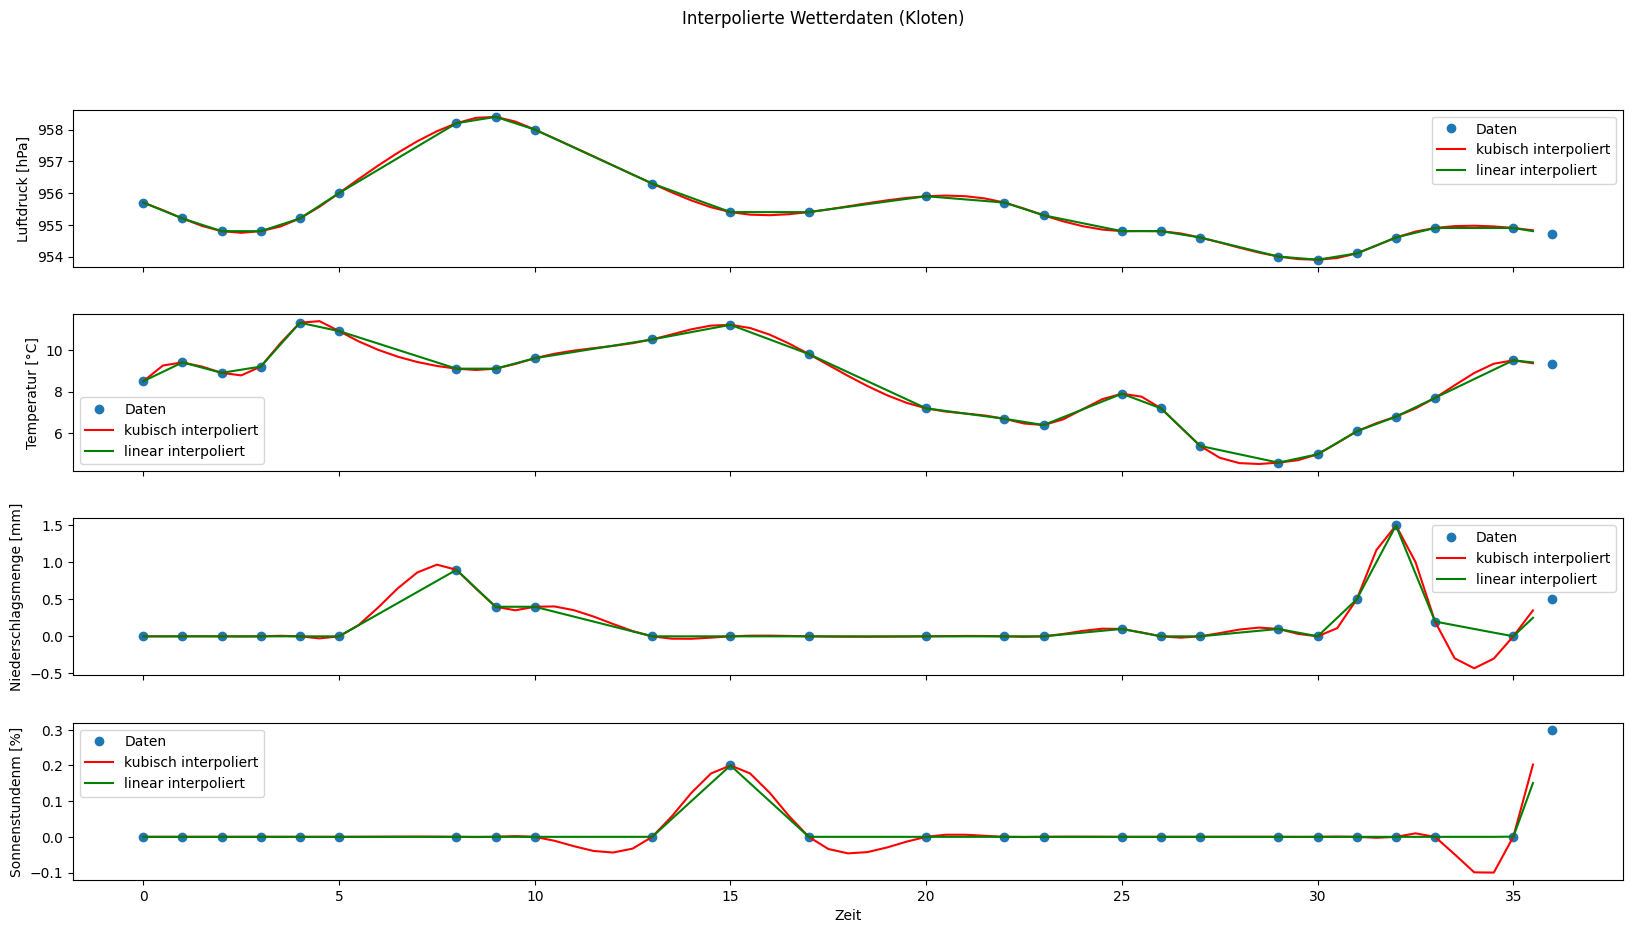

In [48]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(time_diff_demo, pressure[:25], 'o', label='Daten')
ax1.plot(t[0:2*max_demo], pressure_inter_cubic[0:2*max_demo], 'r-', label='kubisch interpoliert')
ax1.plot(t[0:2*max_demo], pressure_inter_linear[0:2*max_demo], 'g-', label='linear interpoliert')
ax1.set_ylabel('Luftdruck [hPa]')
ax1.legend()

ax2.plot(time_diff_demo, temp[:25], 'o', label='Daten')
ax2.plot(t[0:2*max_demo], temp_inter_cubic[0:2*max_demo], 'r-', label='kubisch interpoliert')
ax2.plot(t[0:2*max_demo], temp_inter_linear[0:2*max_demo], 'g-', label='linear interpoliert')
ax2.set_ylabel('Temperatur [°C]')
#ax2.set_xlabel('Zeit')
ax2.legend()

ax3.plot(time_diff_demo, rain[:25], 'o', label='Daten')
ax3.plot(t[0:2*max_demo], rain_inter_cubic[0:2*max_demo], 'r-', label='kubisch interpoliert')
ax3.plot(t[0:2*max_demo], rain_inter_linear[0:2*max_demo], 'g-', label='linear interpoliert')
ax3.set_ylabel('Niederschlagsmenge [mm]') #Einheit: mm ?
#ax3.set_xlabel('Zeit')
ax3.legend()

ax4.plot(time_diff_demo, sunshine[:25], 'o', label='Daten')
ax4.plot(t[0:2*max_demo], sunshine_inter_cubic[0:2*max_demo], 'r-', label='kubisch interpoliert')
ax4.plot(t[0:2*max_demo], sunshine_inter_linear[0:2*max_demo], 'g-', label='linear interpoliert')
ax4.set_ylabel('Sonnenstunden [%]')
#ax4.set_xlabel('Zeit')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolierte Wetterdaten (Kloten)')
plt.show()

Entscheidung: 
 Luftdruck und Temperatur -> kubisch -> Wieso????
 Niederschlagsmenge und Sonnenstunden -> linear -> bei kubisch entstehen nicht reale Daten -> negative Niederschlagsmenden und Sonnenstunden isnd nicht möglich

3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

In [39]:
#Variablen instanzieren
daily_pressure = np.array([]).astype(float)
daily_average_pressure = 0

daily_temp = np.array([]).astype(float)
daily_average_temp = 0

daily_rain = np.array([]).astype(float)
daily_average_rain = 0

daily_sun = np.array([]).astype(float)
daily_average_sun = 0


for i in range(len(t)):
    daily_average_pressure += prestah0_inter_cubic[i]
    daily_average_temp += tre200h0_inter_cubic[i]
    daily_average_rain += rre150h0_inter_linear[i]
    daily_average_sun += su2000h0_inter_linear[i]
    if (i+1) % 48 == 0:
        daily_pressure = np.append(daily_pressure, daily_average_pressure/48)
        daily_average_pressure = 0
        daily_temp = np.append(daily_temp, daily_average_temp/48)
        daily_average_temp = 0
        daily_rain = np.append(daily_rain, daily_average_rain/48)
        daily_average_rain = 0
        daily_sun = np.append(daily_sun, daily_average_sun/48)
        daily_average_sun = 0

#für den letzten Tag wird der Durchschnitt nicht gerechnet, da die letzte stunde fehlt..
#soll die letzte stunde auch noch interpoliert werden oder soll der letzte tag trotzdem gerechnet werden????????????
#if daily_average != 0:
    
print(len(daily_pressure))
print(np.mean(daily_pressure))
print(np.mean(prestah0_inter_cubic))
print(np.max(daily_pressure))

print(len(daily_temp))
print(np.mean(daily_temp))
print(np.mean(tre200h0_inter_cubic))
print(np.max(daily_temp))

print(len(daily_rain))
print(np.mean(daily_rain))
print(np.mean(rre150h0_inter_linear))
print(np.max(daily_rain))

print(len(daily_sun))
print(np.mean(daily_sun))
print(np.mean(su2000h0_inter_linear))
print(np.max(daily_sun))


365
968.7483276283461
968.7549391193081
987.3920407234895
365
11.28179739373919
11.285233318017687
27.020911722714022
365
0.09574226584363142
0.09551431599725967
1.3790881487807403
365
0.23730384078965652
0.23676210924119467
0.6270476326027222


4. Für die folgenden Punkte sollt ihr eine der Variablen auswählen.
   - Entweder Luftdruck, Temperatur, Regenmenge oder Sonnenstunden

Luftdruck it is!

5. Vergleicht die ursprünglichen Daten mit den interpolierten Daten und zeigt eure Erkenntnisse auf. 
   - Hier könnt ihr euch z.B. fragen, wie sich unterschiedliche Interpolationsmethoden verhalten.

6. Berechnet Nullstellen bzw. Schnittpunkte mit einem Schwellenwert und überlegt euch, welche Aussagen ihr daraus ableiten könnt.
   - Ihr könntet z.B. sagen: "In Davos hatten wir im Winter X-mal weniger als Null Grad." oder "An welchen Tagen wurde die Regenmenge XY erreicht?".

In [40]:
from scipy import optimize
print(f_linear_temp(0))
zero = optimize.newton(f_linear_temp, 1000)
print(zero)
print(tre200h0_inter_linear[1900:2000])


[8.5]
[[[[[[[988.17647059]]]]]]]
[ 0.91802828  1.08470443  1.25138059  1.41805674  1.5847329   1.75140905
  1.91085112  2.01085682  2.11629377  2.26630231  2.40543695  2.4554398
  2.49455736  2.44455451  2.38637916  2.26137205  2.13636493  2.01135781
  1.90545972  1.95546257  2.00546541  2.05546826  2.09452889  2.04452605
  2.          2.          1.98355252  1.83354398  1.70548819  1.75549103
  1.79725306  1.77225164  1.74725021  1.72224879  1.68898947  1.58898377
  1.52204384  1.72205522  1.9110333   2.011039    2.11656704  2.26657558
  2.41105608  2.51106177  2.61106746  2.71107316  2.81107885  2.91108454
  2.98336465  2.83335611  2.68334757  2.53333903  2.4         2.4
  2.3888756   2.28886991  2.20556789  2.25557074  2.3         2.3
  2.28047253  2.10546257  1.9304526   1.75544264  1.57763735  1.37762596
  1.19720182  1.1722004   1.14719898  1.12219755  1.11121549  1.21122118
  1.28877313  1.18876744  1.05504697  0.6550242   0.20437802 -0.64567037
 -1.43378309 -1.73380017 -2.03945

7. Mithilfe der Ableitung soll nach grossen Änderungen in den Daten gesucht werden. 
   - So könnt ihr z.B. sagen: "Am Tag X hatten wir die grösste Änderungsrate des Luftdrucks".

In [41]:
def deriv(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def deriv_data(x, y):
    dy = np.diff(y)
    dx = np.diff(x)
    dydx = dy / dx
    yprime = np.empty_like(y)
    yprime[1:-1] = (dydx[:-1] + dydx[1:]) / 2
    yprime[0] = dydx[0]
    yprime[-1] = dydx[-1]
    return yprime

In [42]:
#Finde die Zeitpunkte mit der größten Zunahme bzw. Abnhame des Luftdrucks anhand der Ableitung der Interpolationsfunktion.


In [43]:
#timd_diff_rounded = np.round(time_diff, decimals=1)
#t_rounded = np.round(t, decimals=0)

f_cubic     = interp1d(time_diff, prestah0, kind='cubic')
pressure_prime_inter = deriv(f_cubic, t)

#Finde die Zeitpunkte mit der größten Zunahme bzw. Abnhame des Luftdrucks anhand der Ableitung der Interpolationsfunktion.
i_min = np.argmin(pressure_prime_inter)
i_max = np.argmax(pressure_prime_inter)
print("maximale Abnahme:", (t[i_min], pressure_prime_inter[i_min]))
print("maximale Zunahme:", (t[i_max], pressure_prime_inter[i_max]))

ValueError: A value (8783.00001) in x_new is above the interpolation range's maximum value (8783.0).

In [ ]:
pressure_prime_inter = deriv_data(prestah0_inter_cubic, t)

#Finde die Zeitpunkte mit der größten Zunahme bzw. Abnhame des Luftdrucks anhand der Ableitung der Interpolationsfunktion.
i_min = np.argmin(pressure_prime_inter) #Returns the indices of the minimum values along an axis.
i_max = np.argmax(pressure_prime_inter) #Returns the indices of the maximum values along an axis.
print("maximale Abnahme:", (t[i_min], pressure_prime_inter[i_min]))
print("maximale Zunahme:", (t[i_max], pressure_prime_inter[i_max])) #

In [ ]:
print("i_min:", i_min)
print("i_max:", i_max)

print(prestah0_inter_cubic[i_min-1:i_min+1])
print(prestah0_inter_cubic[14552:14555])

In [ ]:
df = np.gradient(prestah0_inter_cubic)

i_min = np.argmin(df) #Returns the indices of the minimum values along an axis.
i_max = np.argmax(df) #Returns the indices of the maximum values along an axis.
print("maximale Abnahme:", (t[i_min], df[i_min]))
print("maximale Zunahme:", (t[i_max], df[i_max])) #

8. Benutze die Integration, um gewisse Durchschnittswerte über einen definierten Zeitraum zu berechnen.
   - So könnt ihr z.B. die durchschnittlichen Sonnenstunden über den Sommer aufzeigen.

In [ ]:
print(integrate.quad(f_cubic, 0, 10))
print(integrate.trapezoid(prestah0_inter_cubic[:21], t[:21]))

In [ ]:
def mean_func(func, a, b):
    integral, error = integrate.quad(func, a, b)
    return integral / (b - a)

In [ ]:
durschnittsdruck = mean_func(f_cubic, 0, 10)
print(durschnittsdruck)

In [ ]:
ausgewählter_zeitraum_x = t[:21]
ausgewählter_zeitraum_y = prestah0_inter_cubic[:21]

print(ausgewählter_zeitraum_x)
ausgewählter_zeitraum_y

In [ ]:


plt.plot(ausgewählter_zeitraum_x, ausgewählter_zeitraum_y)
plt.fill_between(ausgewählter_zeitraum_x, ausgewählter_zeitraum_y, alpha=0.3)
plt.plot([durschnittsdruck, durschnittsdruck], "r")
plt.xlabel("Messzeitpunkt [h]")
plt.ylabel("bar")
plt.title("Interpolierte Airpressure mit Nullstellen und Mittelwert")
#plt.xlim(t_inter.min(), t_inter.max())
plt.grid()
plt.show()